In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Import the datetime module from the datetime library.
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
        
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | ushuaia
Processing Record 2 of Set 13 | vestmannaeyjar
Processing Record 3 of Set 13 | jiamusi
Processing Record 4 of Set 13 | mao
Processing Record 5 of Set 13 | turukhansk
Processing Record 6 of Set 13 | lavrentiya
Processing Record 7 of Set 13 | bredasdorp
Processing Record 8 of Set 13 | hithadhoo
Processing Record 9 of Set 13 | yellowknife
Processing Record 10 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 13 | ust-uda
Processing Record 13 of Set 13 | kendari
Processing Record 14 of Set 13 | rikitea
Processing Record 15 of Set 13 | disna
Processing Record 16 of Set 13 | phetchaburi
Processing Record 17 of Set 13 | marcona
City not found. Skipping...
Processing Record 18 of Set 13 | bluff
Processing Record 19 of Set 13 | upernavik
Processing Record 20 of Set 13 | klaksvik
Processing Rec

Processing Record 35 of Set 16 | port-cartier
Processing Record 36 of Set 16 | hofn
Processing Record 37 of Set 16 | vila velha
Processing Record 38 of Set 16 | bolungarvik
City not found. Skipping...
Processing Record 39 of Set 16 | beaufort
Processing Record 40 of Set 16 | provideniya
Processing Record 41 of Set 16 | dengzhou
Processing Record 42 of Set 16 | san rafael
Processing Record 43 of Set 16 | kyren
Processing Record 44 of Set 16 | oistins
Processing Record 45 of Set 16 | scarborough
Processing Record 46 of Set 16 | saldanha
Processing Record 47 of Set 16 | pangnirtung
Processing Record 48 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 49 of Set 16 | santa cruz
Processing Record 50 of Set 16 | sao joao da barra
Processing Record 1 of Set 17 | vostok
Processing Record 2 of Set 17 | cabo san lucas
Processing Record 3 of Set 17 | menongue
Processing Record 4 of Set 17 | mount pleasant
Processing Record 5 of Set 17 | harper
Processing Record 6 of Set 17 | 

Processing Record 18 of Set 20 | sakakah
Processing Record 19 of Set 20 | jasper
Processing Record 20 of Set 20 | vaitupu
City not found. Skipping...
Processing Record 21 of Set 20 | neryungri
Processing Record 22 of Set 20 | havoysund
Processing Record 23 of Set 20 | boysun
Processing Record 24 of Set 20 | sisimiut
Processing Record 25 of Set 20 | torrington
Processing Record 26 of Set 20 | kurilsk
Processing Record 27 of Set 20 | fort saint james
Processing Record 28 of Set 20 | kieta
Processing Record 29 of Set 20 | changji
Processing Record 30 of Set 20 | roald
Processing Record 31 of Set 20 | nakskov
Processing Record 32 of Set 20 | bengkulu
Processing Record 33 of Set 20 | jiuquan
Processing Record 34 of Set 20 | la ronge
Processing Record 35 of Set 20 | northam
Processing Record 36 of Set 20 | nome
Processing Record 37 of Set 20 | preobrazheniye
Processing Record 38 of Set 20 | dongdu
Processing Record 39 of Set 20 | rio grande
Processing Record 40 of Set 20 | ossora
Processing 

Processing Record 3 of Set 24 | hervey bay
Processing Record 4 of Set 24 | port hardy
Processing Record 5 of Set 24 | acapulco
Processing Record 6 of Set 24 | qasigiannguit
Processing Record 7 of Set 24 | pedregulho
Processing Record 8 of Set 24 | norrtalje
Processing Record 9 of Set 24 | memari
Processing Record 10 of Set 24 | miraflores
Processing Record 11 of Set 24 | talnakh
Processing Record 12 of Set 24 | tubruq
City not found. Skipping...
Processing Record 13 of Set 24 | diban
Processing Record 14 of Set 24 | iqaluit
Processing Record 15 of Set 24 | coihaique
Processing Record 16 of Set 24 | jalu
Processing Record 17 of Set 24 | bolshegrivskoye
City not found. Skipping...
Processing Record 18 of Set 24 | illapel
Processing Record 19 of Set 24 | sokolo
Processing Record 20 of Set 24 | tianpeng
Processing Record 21 of Set 24 | manyana
Processing Record 22 of Set 24 | sangar
Processing Record 23 of Set 24 | waycross
Processing Record 24 of Set 24 | san ramon
Processing Record 25 of

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.60,76,75,31.07,AR,2021-02-03 02:06:21
1,Vestmannaeyjar,63.4427,-20.2734,36.52,82,67,32.64,IS,2021-02-03 02:07:47
2,Jiamusi,46.8333,130.3500,-9.13,83,0,9.31,CN,2021-02-03 02:07:55
3,Mao,39.8885,4.2658,55.40,94,90,6.91,ES,2021-02-03 02:07:55
4,Turukhansk,65.8167,87.9833,-6.97,91,99,8.95,RU,2021-02-03 02:07:55
5,Lavrentiya,65.5833,-171.0000,4.98,86,100,23.33,RU,2021-02-03 02:06:47
6,Bredasdorp,-34.5322,20.0403,57.20,94,0,5.75,ZA,2021-02-03 02:05:51
7,Hithadhoo,-0.6000,73.0833,82.15,70,1,4.18,MV,2021-02-03 02:06:54
8,Yellowknife,62.4560,-114.3525,-13.00,70,90,10.36,CA,2021-02-03 02:05:33
9,Ust-Uda,54.1742,103.0304,-4.74,90,100,4.47,RU,2021-02-03 02:07:56


In [9]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-02-03 02:06:21,-54.8000,-68.3000,53.60,76,75,31.07
1,Vestmannaeyjar,IS,2021-02-03 02:07:47,63.4427,-20.2734,36.52,82,67,32.64
2,Jiamusi,CN,2021-02-03 02:07:55,46.8333,130.3500,-9.13,83,0,9.31
3,Mao,ES,2021-02-03 02:07:55,39.8885,4.2658,55.40,94,90,6.91
4,Turukhansk,RU,2021-02-03 02:07:55,65.8167,87.9833,-6.97,91,99,8.95
5,Lavrentiya,RU,2021-02-03 02:06:47,65.5833,-171.0000,4.98,86,100,23.33
6,Bredasdorp,ZA,2021-02-03 02:05:51,-34.5322,20.0403,57.20,94,0,5.75
7,Hithadhoo,MV,2021-02-03 02:06:54,-0.6000,73.0833,82.15,70,1,4.18
8,Yellowknife,CA,2021-02-03 02:05:33,62.4560,-114.3525,-13.00,70,90,10.36
9,Ust-Uda,RU,2021-02-03 02:07:56,54.1742,103.0304,-4.74,90,100,4.47


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

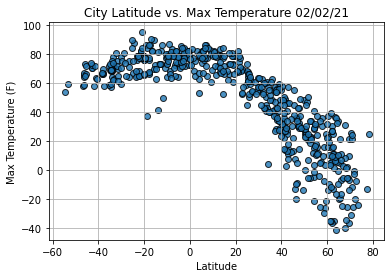

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

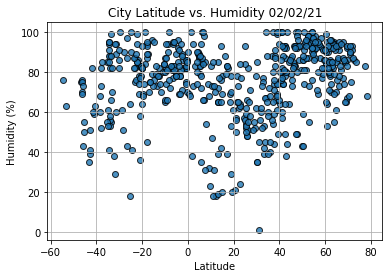

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

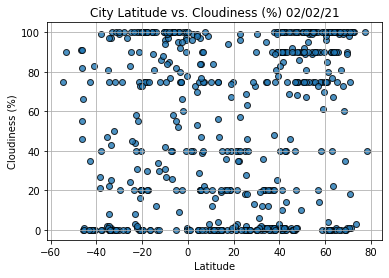

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

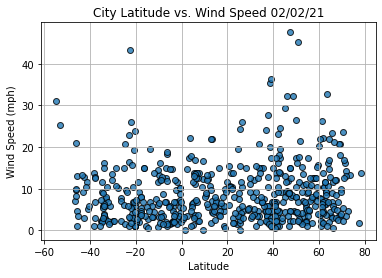

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()